Marketing Research: Customer's satisfaction on the Apple AirPods product

1. Importing Libraries

In [288]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

import numpy as np
import plotly.express as px

print('Libraries imported.')

Libraries imported.


2. Read data set

In [289]:
# Find out your current working directory
import os
print(os.getcwd())

C:\Users\Thanh Tinh Nguyen\Google Drive\Data Science\Toward DS projects\AirPods


In [290]:
# Read data from file 'Data.csv' 
data=pd.read_csv("Data.csv", encoding= 'unicode_escape')
data.head()

Model Smartphone Usage_Length  \
0                 2nd generation     Iphone   3-6 months   
1                 2nd generation    Android   3-6 months   
2                    AirPods Pro    Android   3-6 months   
3                 2nd generation     Iphone   3-6 months   
4  1st generation,2nd generation    Android   3-6 months   

             Usage_Frequency     Usage_Moment Total_Hours_Usage  \
0  More than 5 times per day  Early afternoon         2-4 hours   
1          2-3 times per day  Early afternoon         1-2 hours   
2          4-5 times per day  Early afternoon         2-4 hours   
3          4-5 times per day   Late afternoon         2-4 hours   
4          2-3 times per day          Evening         1-2 hours   

                               Associated_Activities  Regular_Rank_Walking  \
0  Walking,Phone call,Exercising,Working/Studying...                   1.0   
1                              Phone call,Exercising                   2.0   
2                                 Walking,Phone call                   3.0   
3                                         Phone call                   3.0   
4                                         Phone call                   1.0   

   Regular_Rank_PhoneCall  Regular_Rank_Exercising  ...  \
0                     2.0                      3.0  ...   
1                     1.0                      3.0  ...   
2                     1.0                      4.0  ...   
3                     1.0                      2.0  ...   
4                     2.0                      3.0  ...   

   Importance_Water_resistance(Pro)  Change_suggestion    Age  Gender  \
0                         Important                NaN  26-35    Male   
1                         Important                NaN  18-25    Male   
2                         Important                NaN  26-35    Male   
3                  Fairly important                NaN  26-35  Female   
4                  Fairly important                NaN  36-45  Female   

      Employment_status     Student_degree Student_program  \
0         Self-employed                NaN             NaN   
1               Student  Full-time student        Graduate   
2               Student  Full-time student        Graduate   
3  Part-time employment                NaN             NaN   
4  Part-time employment                NaN             NaN   

  Student_program_length Student_current_year Student_major  
0                    NaN                  NaN           NaN  
1                 1 year             1st year      Business  
2                2 years             1st year      Business  
3                    NaN                  NaN           NaN  
4                    NaN                  NaN           NaN  

[5 rows x 41 columns]

In [291]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in data.columns)

True

In [292]:
# View the information of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model                                   89 non-null     object 
 1   Smartphone                              89 non-null     object 
 2   Usage_Length                            89 non-null     object 
 3   Usage_Frequency                         89 non-null     object 
 4   Usage_Moment                            89 non-null     object 
 5   Total_Hours_Usage                       89 non-null     object 
 6   Associated_Activities                   89 non-null     object 
 7   Regular_Rank_Walking                    88 non-null     float64
 8   Regular_Rank_PhoneCall                  88 non-null     float64
 9   Regular_Rank_Exercising                 88 non-null     float64
 10  Regular_Rank_Working/Studying           88 non-null     float64


3. Cleaning data

In [293]:
# Total missing values for each feature
data.isnull().sum()

Model                                      0
Smartphone                                 0
Usage_Length                               0
Usage_Frequency                            0
Usage_Moment                               0
Total_Hours_Usage                          0
Associated_Activities                      0
Regular_Rank_Walking                       1
Regular_Rank_PhoneCall                     1
Regular_Rank_Exercising                    1
Regular_Rank_Working/Studying              1
Regular_Rank_Reading                       1
Regular_Rank_Sleeping                      1
Satisfaction_Design                        0
Satisfaction_Secure_fit_in_ears            0
Satisfaction_Sound_quality                 0
Satisfaction_Tapping_function              0
Satisfaction_Charging_speed                0
Satisfaction_Bluetooth_pairing_process     0
Satisfaction_Battery_life                  0
Satisfaction_Noise_cancellation(Pro)       0
Satisfaction_Water_resistance(Pro)         0
Overall_sa

In [294]:
# Replace using median 
median = data['Regular_Rank_Walking'].median()
data['Regular_Rank_Walking'].fillna(median, inplace=True)

median = data['Regular_Rank_PhoneCall'].median()
data['Regular_Rank_PhoneCall'].fillna(median, inplace=True)

median = data['Regular_Rank_Exercising'].median()
data['Regular_Rank_Exercising'].fillna(median, inplace=True)

median = data['Regular_Rank_Working/Studying'].median()
data['Regular_Rank_Working/Studying'].fillna(median, inplace=True)

median = data['Regular_Rank_Reading'].median()
data['Regular_Rank_Reading'].fillna(median, inplace=True)

median = data['Regular_Rank_Sleeping'].median()
data['Regular_Rank_Sleeping'].fillna(median, inplace=True)

data.isnull().sum()

Model                                      0
Smartphone                                 0
Usage_Length                               0
Usage_Frequency                            0
Usage_Moment                               0
Total_Hours_Usage                          0
Associated_Activities                      0
Regular_Rank_Walking                       0
Regular_Rank_PhoneCall                     0
Regular_Rank_Exercising                    0
Regular_Rank_Working/Studying              0
Regular_Rank_Reading                       0
Regular_Rank_Sleeping                      0
Satisfaction_Design                        0
Satisfaction_Secure_fit_in_ears            0
Satisfaction_Sound_quality                 0
Satisfaction_Tapping_function              0
Satisfaction_Charging_speed                0
Satisfaction_Bluetooth_pairing_process     0
Satisfaction_Battery_life                  0
Satisfaction_Noise_cancellation(Pro)       0
Satisfaction_Water_resistance(Pro)         0
Overall_sa

In [295]:
# Replacing text with value in dataset 
data = data.replace(['Completely satisfied'], 1)
data = data.replace(['Very satisfied'], 2)
data = data.replace(['Satisfied'], 3)
data = data.replace(['Somewhat satisfied'], 4)
data = data.replace(['Not satisfied'], 5)

data = data.replace(['Extremely important'], 1)
data = data.replace(['Fairly important'], 2)
data = data.replace(['Important'], 3)
data = data.replace(['Somewhat important'], 4)
data = data.replace(['Not important'], 5)

data.head()

Model Smartphone Usage_Length  \
0                 2nd generation     Iphone   3-6 months   
1                 2nd generation    Android   3-6 months   
2                    AirPods Pro    Android   3-6 months   
3                 2nd generation     Iphone   3-6 months   
4  1st generation,2nd generation    Android   3-6 months   

             Usage_Frequency     Usage_Moment Total_Hours_Usage  \
0  More than 5 times per day  Early afternoon         2-4 hours   
1          2-3 times per day  Early afternoon         1-2 hours   
2          4-5 times per day  Early afternoon         2-4 hours   
3          4-5 times per day   Late afternoon         2-4 hours   
4          2-3 times per day          Evening         1-2 hours   

                               Associated_Activities  Regular_Rank_Walking  \
0  Walking,Phone call,Exercising,Working/Studying...                   1.0   
1                              Phone call,Exercising                   2.0   
2                                 Walking,Phone call                   3.0   
3                                         Phone call                   3.0   
4                                         Phone call                   1.0   

   Regular_Rank_PhoneCall  Regular_Rank_Exercising  ...  \
0                     2.0                      3.0  ...   
1                     1.0                      3.0  ...   
2                     1.0                      4.0  ...   
3                     1.0                      2.0  ...   
4                     2.0                      3.0  ...   

   Importance_Water_resistance(Pro)  Change_suggestion    Age  Gender  \
0                                 3                NaN  26-35    Male   
1                                 3                NaN  18-25    Male   
2                                 3                NaN  26-35    Male   
3                                 2                NaN  26-35  Female   
4                                 2                NaN  36-45  Female   

      Employment_status     Student_degree  Student_program  \
0         Self-employed                NaN              NaN   
1               Student  Full-time student         Graduate   
2               Student  Full-time student         Graduate   
3  Part-time employment                NaN              NaN   
4  Part-time employment                NaN              NaN   

   Student_program_length  Student_current_year  Student_major  
0                     NaN                   NaN            NaN  
1                  1 year              1st year       Business  
2                 2 years              1st year       Business  
3                     NaN                   NaN            NaN  
4                     NaN                   NaN            NaN  

[5 rows x 41 columns]

In [296]:
# Convert to factor/categorical types
data['Model'] = data['Model'].astype('category')
data['Smartphone'] = data['Smartphone'].astype('category')
data['Usage_Length'] = data['Usage_Length'].astype('category')
data['Usage_Frequency'] = data['Usage_Frequency'].astype('category')
data['Usage_Moment'] = data['Usage_Moment'].astype('category')
data['Total_Hours_Usage'] = data['Total_Hours_Usage'].astype('category')
data['Associated_Activities'] = data['Associated_Activities'].astype('category')

data['Age'] = data['Age'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['Employment_status'] = data['Employment_status'].astype('category')
data['Student_degree'] = data['Student_degree'].astype('category')
data['Student_program'] = data['Student_program'].astype('category')
data['Student_program_length'] = data['Student_program_length'].astype('category')
data['Student_current_year'] = data['Student_current_year'].astype('category')
data['Student_major'] = data['Student_major'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 41 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Model                                   89 non-null     category
 1   Smartphone                              89 non-null     category
 2   Usage_Length                            89 non-null     category
 3   Usage_Frequency                         89 non-null     category
 4   Usage_Moment                            89 non-null     category
 5   Total_Hours_Usage                       89 non-null     category
 6   Associated_Activities                   89 non-null     category
 7   Regular_Rank_Walking                    89 non-null     float64 
 8   Regular_Rank_PhoneCall                  89 non-null     float64 
 9   Regular_Rank_Exercising                 89 non-null     float64 
 10  Regular_Rank_Working/Studying           89 non-null 

4. Exploratory Data Analysis

In [299]:
# Shape of the data frame
data.shape

(89, 41)

In [300]:
# Creat temp1
temp1=data.copy()

In [303]:
# Histogram of Overall Satisfaction target variable
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

fig = px.histogram(temp1,x='Overall_satisfaction')
fig.show()

This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram


C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:184: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam 

This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram
This column can not be represented as a histogram


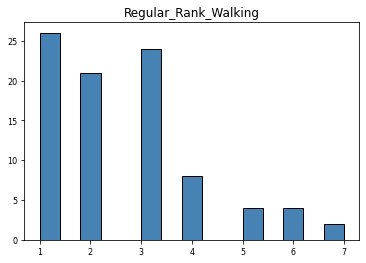

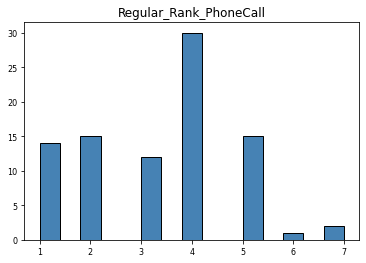

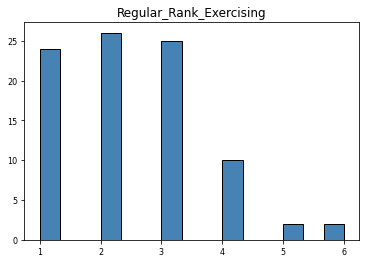

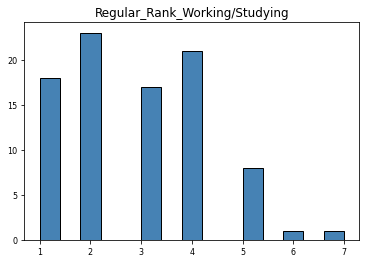

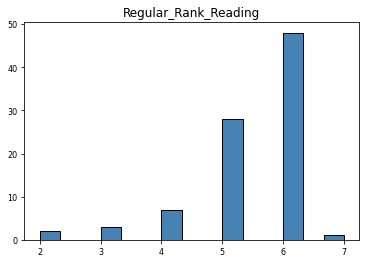

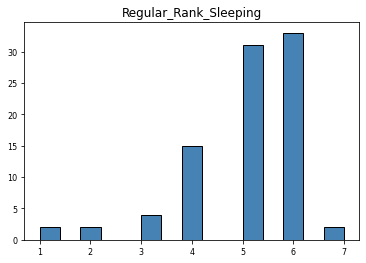

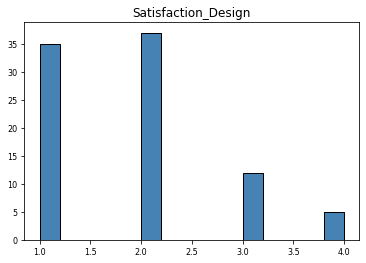

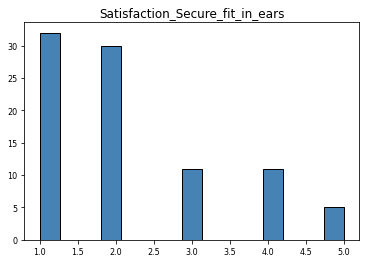

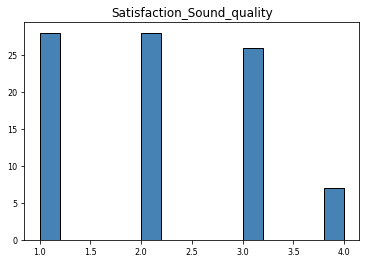

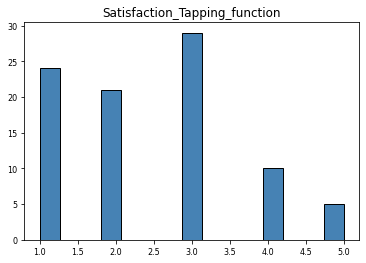

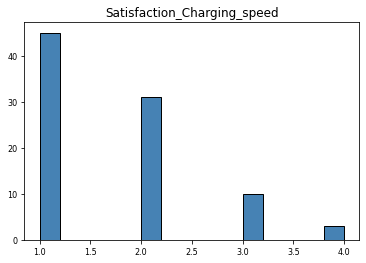

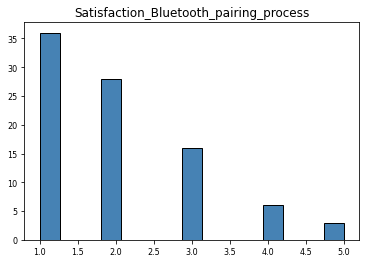

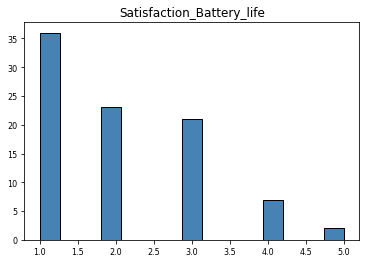

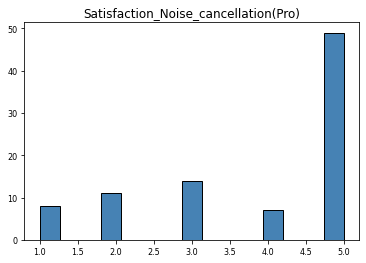

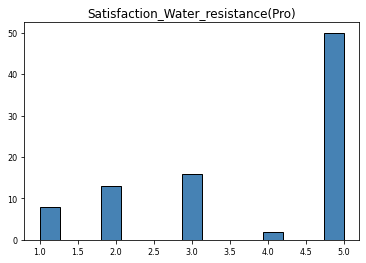

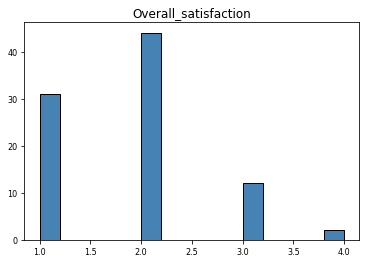

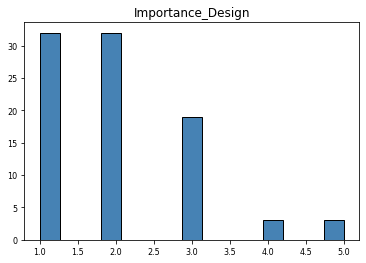

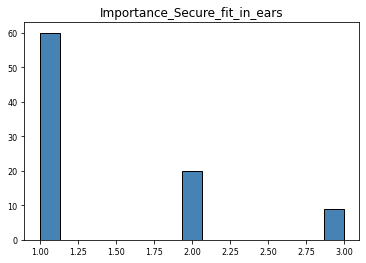

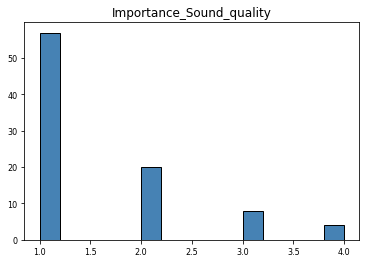

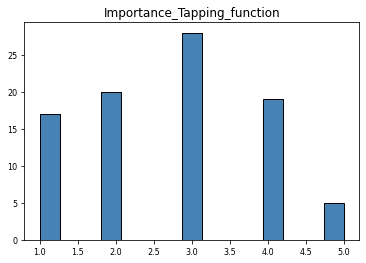

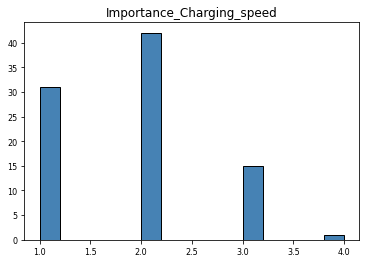

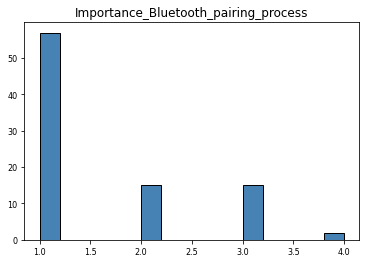

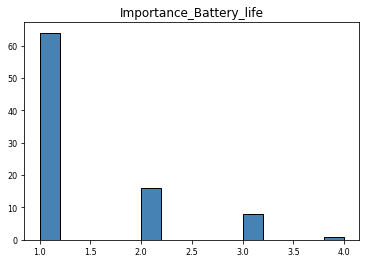

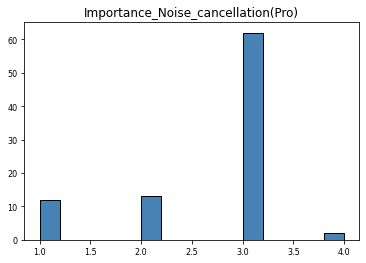

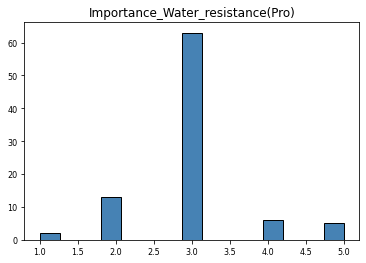

In [304]:
# Visualize the histograms of each numerical variables

for col in temp1.columns: 
    try:      
        temp1[col] = pd.to_numeric(temp1[col]) 
        temp1.hist(column=col,bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)
    except ValueError:
        print('This column can not be represented as a histogram')

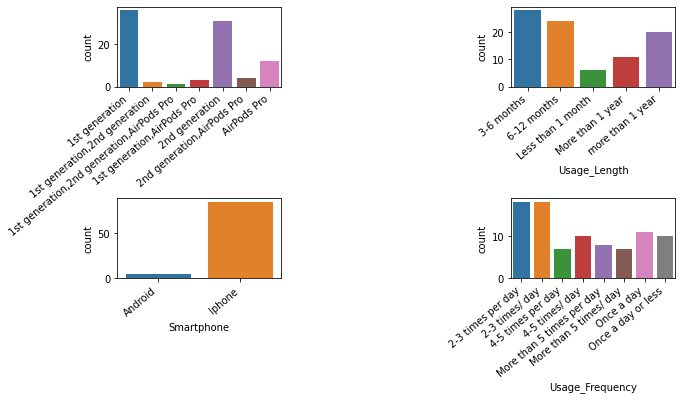

In [305]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=3, ncols=3)

ax0 = fig.add_subplot(gs[0, 0])
ax0 = sns.countplot(x="Model", data=temp1)
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=40, ha="right")

ax1 = fig.add_subplot(gs[2, 0])
ax1 = sns.countplot(x="Smartphone", data=temp1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")

ax2 = fig.add_subplot(gs[0, 2])
ax2 = sns.countplot(x="Usage_Length", data=temp1)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")

ax3 = fig.add_subplot(gs[2, 2])
ax3 = sns.countplot(x="Usage_Frequency", data=temp1)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")

plt.show()

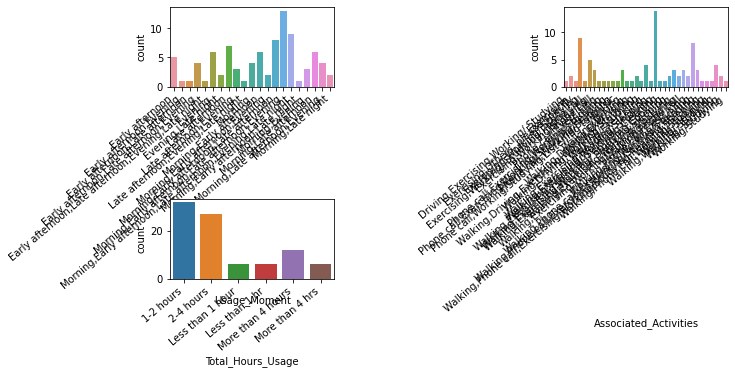

In [306]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=3, ncols=3)

ax4 = fig.add_subplot(gs[0, 0])
ax4 = sns.countplot(x="Usage_Moment", data=temp1)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")

ax5 = fig.add_subplot(gs[2, 0])
ax5 = sns.countplot(x="Total_Hours_Usage", data=temp1)
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")

ax6 = fig.add_subplot(gs[0, 2])
ax6 = sns.countplot(x="Associated_Activities", data=temp1)
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=40, ha="right")

plt.show()

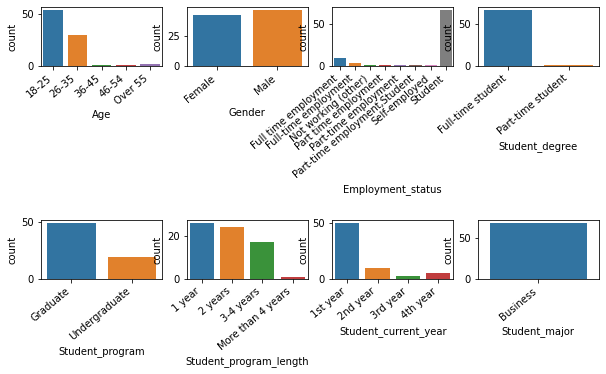

In [307]:
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(nrows=4, ncols=4)

ax7 = fig.add_subplot(gs[0, 0])
ax7 = sns.countplot(x="Age", data=temp1)
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=40, ha="right")

ax8 = fig.add_subplot(gs[0, 1])
ax8 = sns.countplot(x="Gender", data=temp1)
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=40, ha="right")

ax9 = fig.add_subplot(gs[0, 2])
ax9 = sns.countplot(x="Employment_status", data=temp1)
ax9.set_xticklabels(ax9.get_xticklabels(), rotation=40, ha="right")

ax10 = fig.add_subplot(gs[0, 3])
ax10 = sns.countplot(x="Student_degree", data=temp1)
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=40, ha="right")

ax11 = fig.add_subplot(gs[3, 0])
ax11 = sns.countplot(x="Student_program", data=temp1)
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=40, ha="right")

ax12 = fig.add_subplot(gs[3, 1])
ax12 = sns.countplot(x="Student_program_length", data=temp1)
ax12.set_xticklabels(ax12.get_xticklabels(), rotation=40, ha="right")

ax13 = fig.add_subplot(gs[3, 2])
ax13 = sns.countplot(x="Student_current_year", data=temp1)
ax13.set_xticklabels(ax13.get_xticklabels(), rotation=40, ha="right")

ax14 = fig.add_subplot(gs[3, 3])
ax14 = sns.countplot(x="Student_major", data=temp1)
ax14.set_xticklabels(ax14.get_xticklabels(), rotation=40, ha="right")

plt.show()

5. Convert to dummy variables and Correlation Matrix

In [308]:
temp3=data.copy()
temp4=temp3.drop(columns=['Change_suggestion','Student_degree','Student_program','Student_program_length','Student_major','Student_current_year'])
temp4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Model                                   89 non-null     category
 1   Smartphone                              89 non-null     category
 2   Usage_Length                            89 non-null     category
 3   Usage_Frequency                         89 non-null     category
 4   Usage_Moment                            89 non-null     category
 5   Total_Hours_Usage                       89 non-null     category
 6   Associated_Activities                   89 non-null     category
 7   Regular_Rank_Walking                    89 non-null     float64 
 8   Regular_Rank_PhoneCall                  89 non-null     float64 
 9   Regular_Rank_Exercising                 89 non-null     float64 
 10  Regular_Rank_Working/Studying           89 non-null 

In [309]:
# Convert to dummies 
temp4=pd.get_dummies(temp4, columns=['Model'])
temp4=pd.get_dummies(temp4, columns=['Smartphone'])
temp4=pd.get_dummies(temp4, columns=['Usage_Length'])
temp4=pd.get_dummies(temp4, columns=['Usage_Frequency'])
temp4=pd.get_dummies(temp4, columns=['Usage_Moment'])
temp4=pd.get_dummies(temp4, columns=['Total_Hours_Usage'])
temp4=pd.get_dummies(temp4, columns=['Associated_Activities'])
temp4=pd.get_dummies(temp4, columns=['Age'])
temp4=pd.get_dummies(temp4, columns=['Gender'])
temp4=pd.get_dummies(temp4, columns=['Employment_status'])
temp4.shape
temp4.head()

Regular_Rank_Walking  Regular_Rank_PhoneCall  Regular_Rank_Exercising  \
0                   1.0                     2.0                      3.0   
1                   2.0                     1.0                      3.0   
2                   3.0                     1.0                      4.0   
3                   3.0                     1.0                      2.0   
4                   1.0                     2.0                      3.0   

   Regular_Rank_Working/Studying  Regular_Rank_Reading  Regular_Rank_Sleeping  \
0                            4.0                   5.0                    6.0   
1                            4.0                   5.0                    6.0   
2                            2.0                   6.0                    5.0   
3                            4.0                   5.0                    6.0   
4                            4.0                   5.0                    6.0   

   Satisfaction_Design  Satisfaction_Secure_fit_in_ears  \
0                    1                                2   
1                    4                                1   
2                    2                                2   
3                    2                                2   
4                    2                                2   

   Satisfaction_Sound_quality  Satisfaction_Tapping_function  ...  \
0                           3                              2  ...   
1                           1                              1  ...   
2                           3                              2  ...   
3                           2                              2  ...   
4                           2                              2  ...   

   Gender_Female  Gender_Male  Employment_status_Full time employment  \
0              0            1                                       0   
1              0            1                                       0   
2              0            1                                       0   
3              1            0                                       0   
4              1            0                                       0   

   Employment_status_Full-time employment  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Employment_status_Not working (other)  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Employment_status_Part time employment  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   Employment_status_Part-time employment  \
0                                       0   
1                                       0   
2                                       0   
3                                       1   
4                                       1   

   Employment_status_Part-time employment,Student  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Employment_status_Self-employed  Employment_status_Student  
0                                1                          0  
1                                0                          1  
2                                0                          1  
3                                0                          0  
4                                0                          0  

[5 rows x 124 columns]

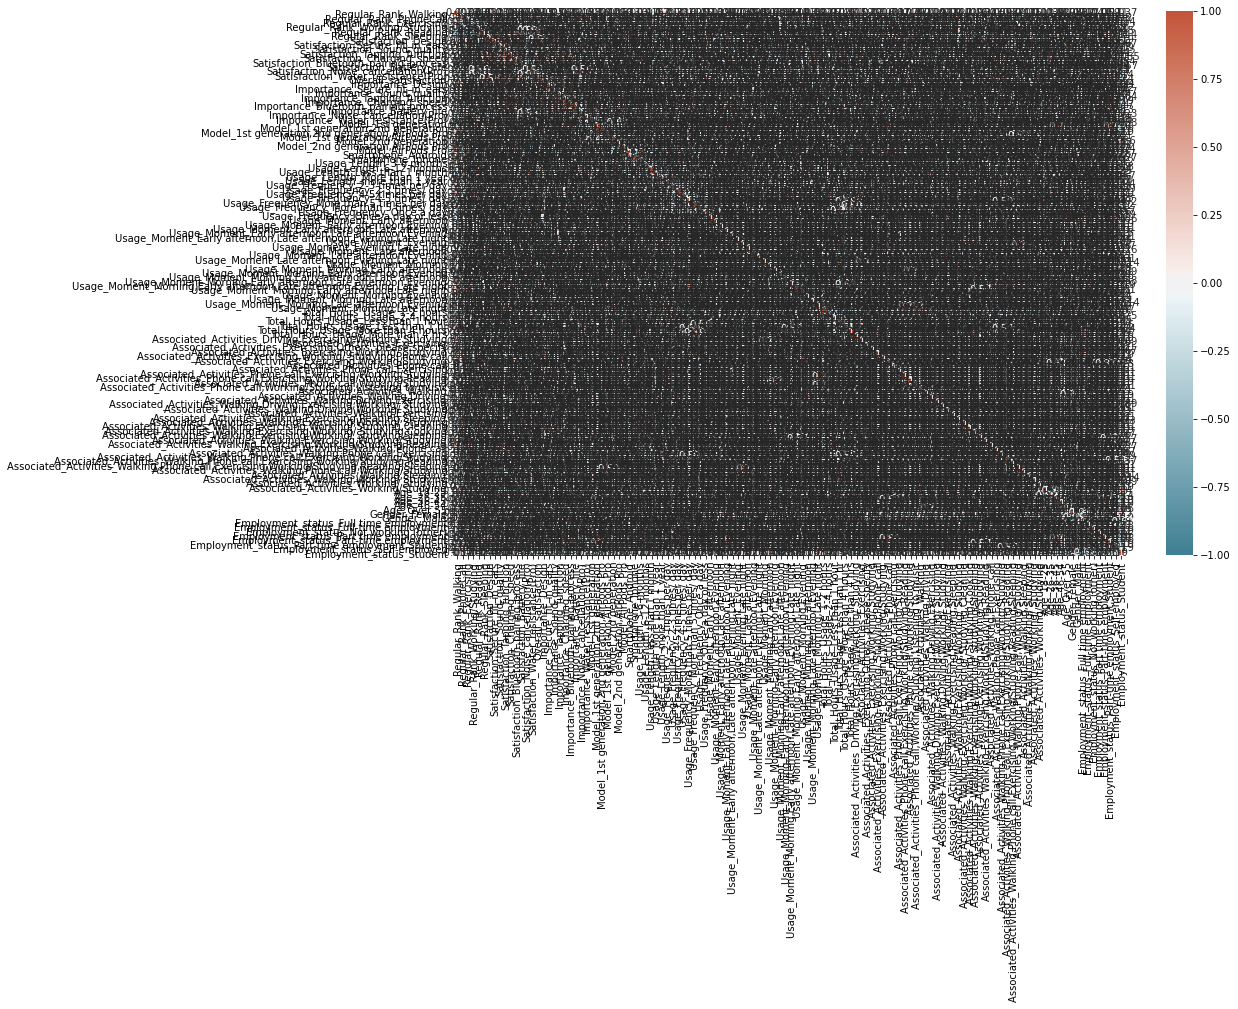

In [310]:
import matplotlib as plt
corr = temp4.corr()
plt.pyplot.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [311]:
# Review covariance between attribute (including all data points)
import matplotlib.pyplot as plt

corr_matrix=temp4.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

7. Modeling

In [312]:
# Total missing values for each feature
temp4.isnull().sum()

Regular_Rank_Walking                              0
Regular_Rank_PhoneCall                            0
Regular_Rank_Exercising                           0
Regular_Rank_Working/Studying                     0
Regular_Rank_Reading                              0
                                                 ..
Employment_status_Part time employment            0
Employment_status_Part-time employment            0
Employment_status_Part-time employment,Student    0
Employment_status_Self-employed                   0
Employment_status_Student                         0
Length: 124, dtype: int64

In [313]:
np.isnan(temp4)
np.where(np.isnan(temp4))

(array([], dtype=int64), array([], dtype=int64))

In [314]:
# Separate feature variables and target variable
X = temp4.drop(['Overall_satisfaction'], axis = 1)
y = temp4['Overall_satisfaction']

In [315]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [316]:
# Split data
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [317]:
import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
set(y_test) - set(y_pred1)

{4}

In [324]:
# Decision Tree
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
from six import StringIO
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from pydot import graph_from_dot_data
iris = load_iris()

model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=None)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

y_pred1 = model1.predict(X_test)
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[5 2 1 0]
 [6 3 2 0]
 [0 2 0 0]
 [0 1 1 0]]
              precision    recall  f1-score   support

           1       0.45      0.62      0.53         8
           2       0.38      0.27      0.32        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.35        23
   macro avg       0.21      0.22      0.21        23
weighted avg       0.34      0.35      0.33        23



In [319]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.83      0.62      0.71         8
           2       0.59      0.91      0.71        11
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2

    accuracy                           0.65        23
   macro avg       0.36      0.38      0.36        23
weighted avg       0.57      0.65      0.59        23



8. Feature Importance

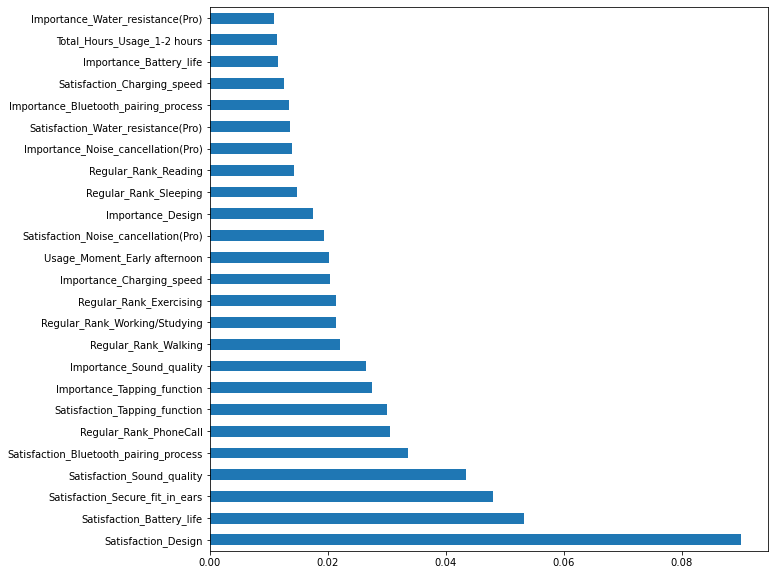

In [320]:
# via Random Forest
feat_importances = pd.Series(model2.feature_importances_, index=X_features.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))